# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

## Importamos las librerias necesarias para ejecutar el notebook

In [1]:
import gdown
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer

In [27]:
# https://drive.google.com/file/d/1EQTh_Ytba8vWUohD4cP74TWdltEVJjVn/view?usp=drive_link

import gdown

file_id = "EQTh_Ytba8vWUohD4cP74TWdltEVJjVn"  
output = "df_sentpreprocess.pkl"  
gdown.download("https://drive.google.com/uc?id=1EQTh_Ytba8vWUohD4cP74TWdltEVJjVn", output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1EQTh_Ytba8vWUohD4cP74TWdltEVJjVn
To: d:\AI Bootcamp Github\despliegue-algoritmos\df_sentpreprocess.pkl
100%|██████████| 1.95M/1.95M [00:00<00:00, 9.94MB/s]


'df_sentpreprocess.pkl'

## Exploración de datos

In [28]:
import pandas as pd

df = pd.read_pickle("df_sentpreprocess.pkl")
print(df.head()) 

                                 fullProcessedReview  sentiment_label
0  mask great even though inside outside let know...                0
1  scissors good got stolen one home care aide re...                0
2              good sensor push easier work reliable                0
3   great orb finish size bought laundry room closet                0
4  wow sticking power stuff crazy using mount pro...                0


In [6]:
df.tail()

,fullProcessedReview,sentiment_label
9995,baby bottle brush local retail store would pre...,1
9996,clear sound,1
9997,sent think copper sheet bronze match copper pi...,1
9998,junk first one used broke upon gentle tighteni...,1
9999,work great existing meter nice better resoluti...,0


In [7]:
# Verificar columnas relevantes
print(df.columns)

# Confirmar que no haya valores nulos
print(df.isnull().sum())

# Opcional: Eliminar filas con valores nulos en las columnas necesarias (si existieran)

print(f"Dimensiones del DataFrame después de eliminar nulos: {df.shape}")

Index(['fullProcessedReview', 'sentiment_label'], dtype='object')
fullProcessedReview    0
sentiment_label        0
dtype: int64
Dimensiones del DataFrame después de eliminar nulos: (10000, 2)


## **Preprocesamiento (df ya esta limpio, falta vectorizar)**

### **Conversión de texto en númericas Vectorizer BOW (bag-of-words)**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Configuración del TfidfVectorizer
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(1, 2)
)

# Aplicar el vectorizador al texto
X_bow = cv.fit_transform(df['fullProcessedReview']).toarray()

# Etiquetas de salida
y = df['sentiment_label']

# Inspeccionar las dimensiones de la matriz
print(f"Dimensiones de X_bow: {X_bow.shape}")  # (n_reviews, 2500)
print(f"Distribución de las etiquetas: {y.value_counts()}")


Dimensiones de X_bow: (10000, 2500)
Distribución de las etiquetas: sentiment_label
0    5000
1    5000
Name: count, dtype: int64


In [30]:
# Separar las etiquetas
y = df['sentiment_label']

# Verificar la distribución de las etiquetas
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(f"Distribución de las etiquetas: {dict(zip(unique, counts))}")


Distribución de las etiquetas: {np.int64(0): np.int64(5000), np.int64(1): np.int64(5000)}


In [ ]:
# X_bow es la matriz vectorizada.
# y son las etiquetas (sentiment_label).


(10000, 2)

In [16]:
import joblib

# Guardar X_bow y y como archivos separados
joblib.dump(X_bow, "X_bow.pkl")
joblib.dump(y, "y.pkl")

print("X_bow y y guardados con éxito.")


X_bow y y guardados con éxito.


In [8]:
import joblib
import pandas as pd

# Cargar X_bow y y desde los archivos guardados
X_bow = joblib.load("D:/AI Bootcamp Github/despliegue-algoritmos/pkl NLP/X_bow.pkl")
y = joblib.load("D:/AI Bootcamp Github/despliegue-algoritmos/pkl NLP/y.pkl")

# Convertir X_bow a un DataFrame para ver el head y tail
df_vectorized = pd.DataFrame(X_bow)

# Mostrar primeras y últimas filas
print("Head del DataFrame vectorizado:")
print(df_vectorized.head())

print("\nTail del DataFrame vectorizado:")
print(df_vectorized.tail())



Head del DataFrame vectorizado:
   0     1     2     3     4     5     6     7     8     9     ...  2490  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   2491  2492  2493  2494  2495  2496  2497  2498  2499  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2500 columns]

Tail del DataFrame vectorizado:
      0     1     2     3     4     5     6     7     8     9     ...  2490  \
9995   0.0   0.0   0.0   0

### **Revisión de reviews random después de Vectorizar**

In [10]:
# Elegir un índice aleatorio
sample_index = 2689  

# Ver la reseña original
original_review = df['fullProcessedReview'].iloc[sample_index]
print("Reseña original:")
print(original_review)

# Ver su representación vectorizada
vectorized_review = X_bow[sample_index]
print("\nVector TF-IDF (primeros 10 valores):")
print(vectorized_review[:10])

# Mostrar palabras más relevantes del vectorizador
feature_names = cv.get_feature_names_out()
important_words = [(feature_names[i], vectorized_review[i]) for i in range(len(feature_names)) if vectorized_review[i] > 0]

# Mostrar las palabras más relevantes de la reseña
print("\nPalabras relevantes en la reseña:")
for word, score in sorted(important_words, key=lambda x: -x[1])[:10]:
    print(f"{word}: {score:.4f}")


Reseña original:
simple value bend fit top seat big trk

Vector TF-IDF (primeros 10 valores):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Palabras relevantes en la reseña:
seat: 0.5173
bend: 0.4282
simple: 0.3971
value: 0.3422
big: 0.3186
top: 0.3165
fit: 0.2696


In [11]:
# Mostrar solo valores no cero y sus índices
non_zero_indices = np.nonzero(vectorized_review)[0]
print("Índices no cero y sus valores:")
for idx in non_zero_indices[:10]:  # Mostrar hasta 10 para simplicidad
    print(f"Índice: {idx}, Valor TF-IDF: {vectorized_review[idx]:.4f}, Palabra: {feature_names[idx]}")


Índices no cero y sus valores:
Índice: 171, Valor TF-IDF: 0.4282, Palabra: bend
Índice: 181, Valor TF-IDF: 0.3186, Palabra: big
Índice: 798, Valor TF-IDF: 0.2696, Palabra: fit
Índice: 1867, Valor TF-IDF: 0.5173, Palabra: seat
Índice: 1945, Valor TF-IDF: 0.3971, Palabra: simple
Índice: 2222, Valor TF-IDF: 0.3165, Palabra: top
Índice: 2327, Valor TF-IDF: 0.3422, Palabra: value


In [20]:
# Guardar las etiquetas (sentiment_label) en un archivo separado
df[['sentiment_label']].to_csv('sentiment_label.csv', index=False)

# Eliminar la columna sentiment_label del DataFrame
df_without_labels = df.drop(columns=['sentiment_label'])

# Guardar el resto del DataFrame (fullProcessedReview) en otro archivo
df_without_labels.to_csv('fullProcessedReview.csv', index=False)

print("Archivos guardados: 'sentiment_label.csv' y 'fullProcessedReview.csv'")


Archivos guardados: 'sentiment_label.csv' y 'fullProcessedReview.csv'


In [6]:
import pandas as pd

# Cargar archivos
X_raw = pd.read_csv('D:/AI Bootcamp Github/despliegue-algoritmos/pkl NLP/fullProcessedReview.csv')  # Características
y_raw = pd.read_csv('D:/AI Bootcamp Github/despliegue-algoritmos/pkl NLP/sentiment_label.csv')      # Etiquetas

# Mostrar las primeras filas para confirmar
print("Características (X_raw):")
print(X_raw.head())

print("\nEtiquetas (y_raw):")
print(y_raw.head())


Características (X_raw):
                                 fullProcessedReview
0  mask great even though inside outside let know...
1  scissors good got stolen one home care aide re...
2              good sensor push easier work reliable
3   great orb finish size bought laundry room closet
4  wow sticking power stuff crazy using mount pro...

Etiquetas (y_raw):
   sentiment_label
0                0
1                0
2                0
3                0
4                0


# **División datos vectorizados en Train y Test**

In [9]:
from sklearn.model_selection import train_test_split

# Dividir la matriz vectorizada y las etiquetas
X_train, X_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=123, stratify=y
)

# Verificar las dimensiones
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")


Dimensiones de X_train: (8000, 2500)
Dimensiones de X_test: (2000, 2500)


In [10]:
# Mostrar las primeras filas de X_train y confirmar datos a númericos
import pandas as pd
print("Primeras filas de X_train (vectorizado):")
print(pd.DataFrame(X_train).head())


Primeras filas de X_train (vectorizado):
   0     1         2     3        4     5     6     7     8     9     ...  \
0   0.0   0.0  0.000000   0.0  0.00000   0.0   0.0   0.0   0.0   0.0  ...   
1   0.0   0.0  0.222252   0.0  0.33187   0.0   0.0   0.0   0.0   0.0  ...   
2   0.0   0.0  0.000000   0.0  0.00000   0.0   0.0   0.0   0.0   0.0  ...   
3   0.0   0.0  0.000000   0.0  0.00000   0.0   0.0   0.0   0.0   0.0  ...   
4   0.0   0.0  0.000000   0.0  0.00000   0.0   0.0   0.0   0.0   0.0  ...   

   2490  2491  2492  2493  2494  2495  2496  2497  2498  2499  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2500 columns]


## **Configuración del Modelo RandomForestClassifier**



In [26]:
# Configurar el clasificador
clf = RandomForestClassifier(
    n_estimators=100,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=123
)

# Crear el pipeline con preprocesamiento y modelo
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])
model = Pipeline(steps=[('preprocessor', preprocessor), ('RandomForestClassifier', clf)])

print("Modelo configurado con RandomForestClassifier.")

Modelo configurado con RandomForestClassifier.


## **Entrenamiento del Modelo clf**

In [30]:
from sklearn import set_config

# Habilitar el modo de visualización
set_config(display='diagram')


In [31]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

print("Entrenamiento completado con éxito.")


Entrenamiento completado con éxito.


# **Evaluación del Modelo clf y Obtención de Parámetros**
1. **Evaluación del Rendimiento en el Conjunto de Entrenamiento:**


In [32]:
accuracy_train = model.score(X_train, y_train)
accuracy_train

0.94325

2. **Evaluación del Rendimiento en el Conjunto de Prueba:**

In [33]:
model.score(X_test, y_test)

0.794

3. **Obtención de Parámetros del Modelo:**

In [34]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor', Pipeline(steps=[('scaler', StandardScaler())])),
  ('RandomForestClassifier',
   RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                          random_state=123))],
 'transform_input': None,
 'verbose': False,
 'preprocessor': Pipeline(steps=[('scaler', StandardScaler())]),
 'RandomForestClassifier': RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                        random_state=123),
 'preprocessor__memory': None,
 'preprocessor__steps': [('scaler', StandardScaler())],
 'preprocessor__transform_input': None,
 'preprocessor__verbose': False,
 'preprocessor__scaler': StandardScaler(),
 'preprocessor__scaler__copy': True,
 'preprocessor__scaler__with_mean': True,
 'preprocessor__scaler__with_std': True,
 'RandomForestClassifier__bootstrap': True,
 'RandomForestClassifier__ccp_alpha': 0.0,
 'RandomForestClassifier__class_weight': 'balanced',
 'RandomForestClassifier__criterion': 'gini',
 '

In [35]:
import joblib

# Guardar el modelo entrenado
joblib.dump(model, "D:/AI Bootcamp Github/despliegue-algoritmos/pkl NLP/random_forest_model.pkl")
print("Modelo guardado como 'random_forest_model.pkl'")


Modelo guardado como 'random_forest_model.pkl'


In [ ]:
# Cargar el modelo después
model = joblib.load("random_forest_model.pkl")
print("Modelo cargado con éxito.")


## **Configuración Mlflow**

In [14]:
# Configurar la URI del servidor MLflow (local)
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [36]:
import mlflow

# Configurar o crear un experimento
mlflow.set_experiment("Amazon_Reviews_Sentiment_Analysis")


2024/12/11 18:43:41 INFO mlflow.tracking.fluent: Experiment with name 'Amazon_Reviews_Sentiment_Analysis' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/585671074969627718', creation_time=1733939021434, experiment_id='585671074969627718', last_update_time=1733939021434, lifecycle_stage='active', name='Amazon_Reviews_Sentiment_Analysis', tags={}>

## **Modelo 1 RF**

In [37]:
with mlflow.start_run(run_name="Training_1_RF") as run:
    # Registrar los hiperparámetros
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("min_samples_leaf", 2)
    mlflow.log_param("class_weight", "balanced")

    # Registrar métricas de entrenamiento y prueba
    mlflow.log_metric("accuracy_train", accuracy_train)
    mlflow.log_metric("accuracy_test", model.score(X_test, y_test))

    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(model, "random_forest_model")
    print("Métricas y modelo registrados en MLflow.")


2024/12/11 18:46:52 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/12/11 18:46:56 WARNING mlflow.models.model: Model logged without a signature and input example. Ple

Métricas y modelo registrados en MLflow.
🏃 View run Training_1_RF at: http://127.0.0.1:5000/#/experiments/585671074969627718/runs/5550c6c31a214a4c8df90853cfe8279a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/585671074969627718


## **Modelo 2 RF**

In [40]:
# Entrenando el segundo modelo (model_2)
model_2 = RandomForestClassifier(n_estimators=150, min_samples_leaf=3, class_weight="balanced", random_state=123)
model_2.fit(X_train, y_train)

# Calcular las métricas para el segundo modelo
accuracy_train_2 = model_2.score(X_train, y_train)
accuracy_test_2 = model_2.score(X_test, y_test)

# Registrar las métricas de la segunda ejecución
with mlflow.start_run(run_name="Training_2_RF") as run:
    mlflow.log_param("n_estimators", 150)
    mlflow.log_param("min_samples_leaf", 3)
    mlflow.log_param("class_weight", "balanced")
    
    mlflow.log_metric("accuracy_train", accuracy_train_2)
    mlflow.log_metric("accuracy_test", accuracy_test_2)

    # Registrar el segundo modelo en MLflow
    mlflow.sklearn.log_model(model_2, "random_forest_model_2")
    print("Segunda ejecución registrada en MLflow.")


2024/12/11 19:05:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Segunda ejecución registrada en MLflow.
🏃 View run Training_2_RF at: http://127.0.0.1:5000/#/experiments/585671074969627718/runs/972b117649574024b2738786e66cbc38
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/585671074969627718


In [2]:
import mlflow

# Seleccionar el experimento existente
mlflow.set_experiment("Amazon_Reviews_Sentiment_Analysis")


<Experiment: artifact_location='mlflow-artifacts:/585671074969627718', creation_time=1733939021434, experiment_id='585671074969627718', last_update_time=1733939021434, lifecycle_stage='active', name='Amazon_Reviews_Sentiment_Analysis', tags={}>

## **Modelo 3 RF**

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Ajustar el modelo con los nuevos hiperparámetros
model_3 = RandomForestClassifier(n_estimators=150, 
                                 max_depth=10,  # Limitar la profundidad
                                 min_samples_split=5,  # Aumentar min_samples_split
                                 min_samples_leaf=3, 
                                 class_weight="balanced", 
                                 random_state=123)

# Entrenar el modelo con los datos
model_3.fit(X_train, y_train)

# Calcular las métricas para el tercer modelo
accuracy_train_3 = model_3.score(X_train, y_train)
accuracy_test_3 = model_3.score(X_test, y_test)

# Mostrar las métricas para verificar
print(f"Accuracy Train 3: {accuracy_train_3}")
print(f"Accuracy Test 3: {accuracy_test_3}")


Accuracy Train 3: 0.80375
Accuracy Test 3: 0.7805


In [15]:
import mlflow
import mlflow.sklearn

# Registrar el modelo y las métricas en MLflow
with mlflow.start_run(run_name="Training_3_RF") as run:
    # Registrar los hiperparámetros
    mlflow.log_param("n_estimators", 150)
    mlflow.log_param("max_depth", 10)
    mlflow.log_param("min_samples_split", 5)
    mlflow.log_param("min_samples_leaf", 3)
    mlflow.log_param("class_weight", "balanced")
    
    # Registrar métricas de entrenamiento y prueba
    mlflow.log_metric("accuracy_train", accuracy_train_3)
    mlflow.log_metric("accuracy_test", accuracy_test_3)
    
    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(model_3, "random_forest_model_3")
    print("Tercer modelo registrado en MLflow.")


2024/12/14 16:33:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Tercer modelo registrado en MLflow.
🏃 View run Training_3_RF at: http://127.0.0.1:5000/#/experiments/585671074969627718/runs/a5a23144af604a9983814d47d70262ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/585671074969627718


## **Modelo 4 RF**

In [16]:
# Ajustar el modelo para el 4to experimento con nuevos hiperparámetros
model_4 = RandomForestClassifier(
    n_estimators=200,  # Aumentar los estimadores
    max_depth=8,  # Limitar la profundidad más
    min_samples_split=6,  # Aumentar min_samples_split
    min_samples_leaf=4,  # Aumentar min_samples_leaf
    max_features='sqrt',  # Probar con max_features='sqrt'
    class_weight="balanced", 
    random_state=123
)

# Entrenar el modelo
model_4.fit(X_train, y_train)

# Calcular las métricas
accuracy_train_4 = model_4.score(X_train, y_train)
accuracy_test_4 = model_4.score(X_test, y_test)

# Mostrar las métricas
print(f"Accuracy Train 4: {accuracy_train_4}")
print(f"Accuracy Test 4: {accuracy_test_4}")


Accuracy Train 4: 0.7885
Accuracy Test 4: 0.774


In [17]:
import mlflow
import mlflow.sklearn

# Registrar el modelo y las métricas en MLflow
with mlflow.start_run(run_name="Training_4_RF") as run:
    # Registrar los hiperparámetros
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("max_depth", 8)
    mlflow.log_param("min_samples_split", 6)
    mlflow.log_param("min_samples_leaf", 4)
    mlflow.log_param("max_features", "sqrt")
    mlflow.log_param("class_weight", "balanced")
    
    # Registrar métricas de entrenamiento y prueba
    mlflow.log_metric("accuracy_train", accuracy_train_4)
    mlflow.log_metric("accuracy_test", accuracy_test_4)
    
    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(model_4, "random_forest_model_4")
    print("Cuarto modelo registrado en MLflow.")


2024/12/14 16:36:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Cuarto modelo registrado en MLflow.
🏃 View run Training_4_RF at: http://127.0.0.1:5000/#/experiments/585671074969627718/runs/afdb5a454c7e4e619143bca6725dbd80
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/585671074969627718


## **Modelo 5 RF**

In [18]:
# Ajustar el modelo para el 5to experimento con los nuevos hiperparámetros
model_5 = RandomForestClassifier(
    n_estimators=250,  # Aumentar los estimadores
    max_depth=20,  # Aumentar la profundidad
    min_samples_split=2,  # Reducir min_samples_split
    min_samples_leaf=2,  # Reducir min_samples_leaf
    max_features='sqrt',  # Mantener el max_features ajustado
    class_weight="balanced", 
    random_state=123
)

# Entrenar el modelo
model_5.fit(X_train, y_train)

# Calcular las métricas
accuracy_train_5 = model_5.score(X_train, y_train)
accuracy_test_5 = model_5.score(X_test, y_test)

# Mostrar las métricas
print(f"Accuracy Train 5: {accuracy_train_5}")
print(f"Accuracy Test 5: {accuracy_test_5}")


Accuracy Train 5: 0.846375
Accuracy Test 5: 0.7835


In [19]:
import mlflow
import mlflow.sklearn

# Registrar el modelo y las métricas en MLflow
with mlflow.start_run(run_name="Training_5_RF") as run:
    # Registrar los hiperparámetros
    mlflow.log_param("n_estimators", 250)
    mlflow.log_param("max_depth", 20)
    mlflow.log_param("min_samples_split", 2)
    mlflow.log_param("min_samples_leaf", 2)
    mlflow.log_param("max_features", "sqrt")
    mlflow.log_param("class_weight", "balanced")
    
    # Registrar métricas de entrenamiento y prueba
    mlflow.log_metric("accuracy_train", accuracy_train_5)
    mlflow.log_metric("accuracy_test", accuracy_test_5)
    
    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(model_5, "random_forest_model_5")
    print("Quinto modelo registrado en MLflow.")


2024/12/14 16:40:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Quinto modelo registrado en MLflow.
🏃 View run Training_5_RF at: http://127.0.0.1:5000/#/experiments/585671074969627718/runs/65d53f2e85ef48fa97c918d7de04741b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/585671074969627718


## **Modelo 6 RF GridSearchCV**

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Usar el modelo original con parámetros base
clf = RandomForestClassifier(
    n_estimators=100,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=123
)

# Definir los parámetros que vamos a optimizar
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
}

# Usar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con la búsqueda de los mejores parámetros
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Calcular las métricas con el mejor modelo
accuracy_train_best = best_model.score(X_train, y_train)
accuracy_test_best = best_model.score(X_test, y_test)

# Mostrar las métricas para verificar
print(f"Accuracy Train Best: {accuracy_train_best}")
print(f"Accuracy Test Best: {accuracy_test_best}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros encontrados: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy Train Best: 0.916625
Accuracy Test Best: 0.794


In [22]:
import mlflow
import mlflow.sklearn

# Registrar el modelo y las métricas en MLflow
with mlflow.start_run(run_name="Training_6_RF_GS") as run:
    # Registrar los hiperparámetros
    mlflow.log_param("n_estimators", 150)
    mlflow.log_param("max_depth", None)
    mlflow.log_param("min_samples_split", 2)
    mlflow.log_param("min_samples_leaf", 3)
    mlflow.log_param("class_weight", "balanced")
    
    # Registrar métricas de entrenamiento y prueba
    mlflow.log_metric("accuracy_train", accuracy_train_best)
    mlflow.log_metric("accuracy_test", accuracy_test_best)
    
    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(best_model, "random_forest_model_6_gs")
    print("Modelo optimizado registrado en MLflow.")


2024/12/14 17:04:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo optimizado registrado en MLflow.
🏃 View run Training_6_RF_GS at: http://127.0.0.1:5000/#/experiments/585671074969627718/runs/f9bfee16f0c641febd39030831624d73
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/585671074969627718


## **Modelo 7 RF Cross-Val**

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Usar X_bow como las características vectorizadas
X = X_bow  # Características vectorizadas

# Asegurarse de que las etiquetas estén correctamente definidas y convertir a 1D
y = y_raw.values.ravel()  # Convertir y_raw a 1D

# Volver al modelo original con los parámetros iniciales
clf = RandomForestClassifier(
    n_estimators=100,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=123
)

# Realizar validación cruzada con 5 pliegues
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Verificar las métricas
print(f"Scores de validación cruzada: {cv_scores}")
print(f"Accuracy promedio de validación cruzada: {np.mean(cv_scores)}")
print(f"Desviación estándar de validación cruzada: {np.std(cv_scores)}")


Scores de validación cruzada: [0.758  0.777  0.7805 0.8145 0.7915]
Accuracy promedio de validación cruzada: 0.7843
Desviación estándar de validación cruzada: 0.018565020872598013


In [33]:
import mlflow
import mlflow.sklearn

# Registrar el modelo y las métricas en MLflow
with mlflow.start_run(run_name="Training_7_RF_Cros-Val") as run:
    # Registrar los hiperparámetros
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("min_samples_leaf", 2)
    mlflow.log_param("class_weight", "balanced")
    
    # Registrar métricas de entrenamiento y prueba
    mlflow.log_metric("accuracy_train", np.mean(cv_scores))
    mlflow.log_metric("accuracy_test", np.mean(cv_scores))
    
    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(clf, "random_forest_model_7_CV")
    print("Modelo y métricas registrados en MLflow.")


2024/12/14 17:45:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo y métricas registrados en MLflow.
🏃 View run Training_7_RF_Cros-Val at: http://127.0.0.1:5000/#/experiments/585671074969627718/runs/1c969cc2658046c7831ebdd29551e5a4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/585671074969627718


## **Modelo 8 RF GradientBoostClassifier**

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Ajustar el nuevo modelo
model_gb = GradientBoostingClassifier(
    n_estimators=100, 
    max_depth=10, 
    random_state=123
)

# Entrenar el modelo
model_gb.fit(X_train, y_train)

# Calcular el accuracy
accuracy_train_gb = model_gb.score(X_train, y_train)
accuracy_test_gb = model_gb.score(X_test, y_test)

# Mostrar métricas
print(f"Accuracy Train GB: {accuracy_train_gb}")
print(f"Accuracy Test GB: {accuracy_test_gb}")


Accuracy Train GB: 0.939
Accuracy Test GB: 0.79


In [35]:
import mlflow
import mlflow.sklearn

# Registrar el modelo y las métricas en MLflow
with mlflow.start_run(run_name="Training_8_GB") as run:
    # Registrar los hiperparámetros
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)
    
    # Registrar métricas de entrenamiento y prueba
    mlflow.log_metric("accuracy_train", accuracy_train_gb)
    mlflow.log_metric("accuracy_test", accuracy_test_gb)
    
    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(model_gb, "gradient_boosting_model_1")
    print("Modelo y métricas registrados en MLflow.")


2024/12/14 17:56:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo y métricas registrados en MLflow.
🏃 View run Training_8_GB at: http://127.0.0.1:5000/#/experiments/585671074969627718/runs/e08e78d41c5d4766afe9be3b05414644
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/585671074969627718


## **MLFLOW interfaz**

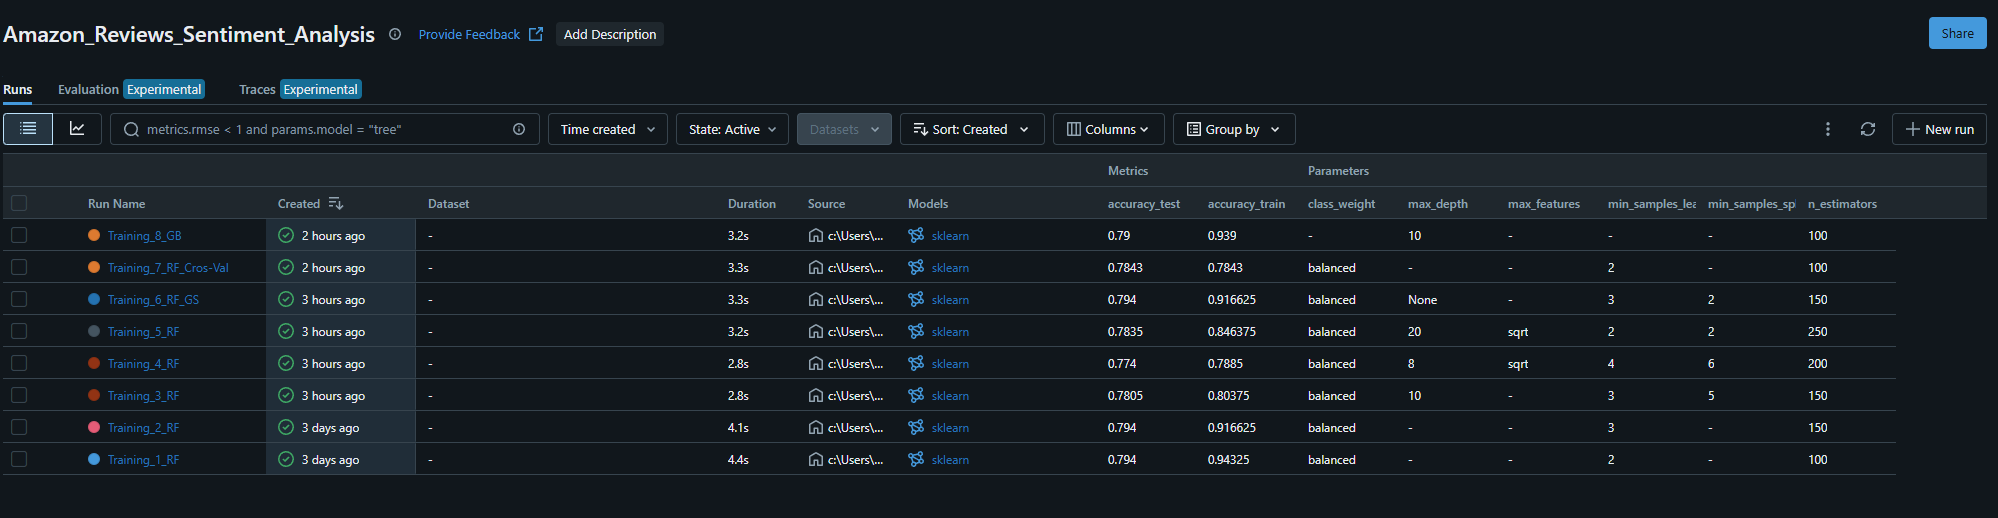

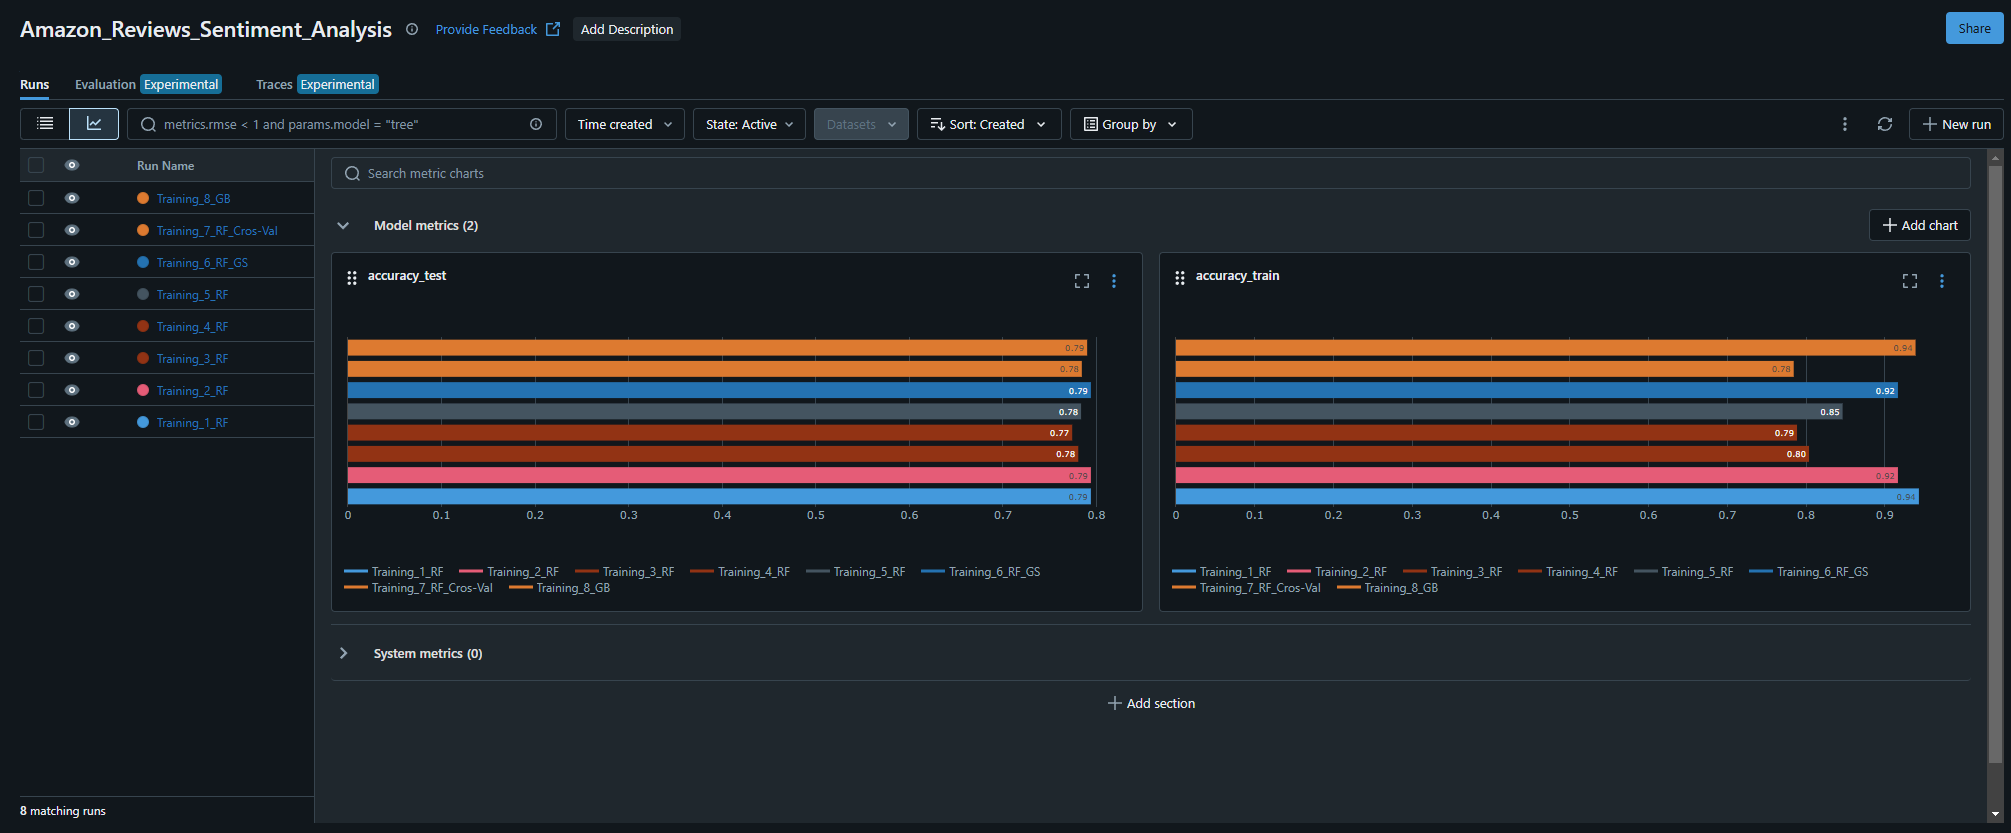

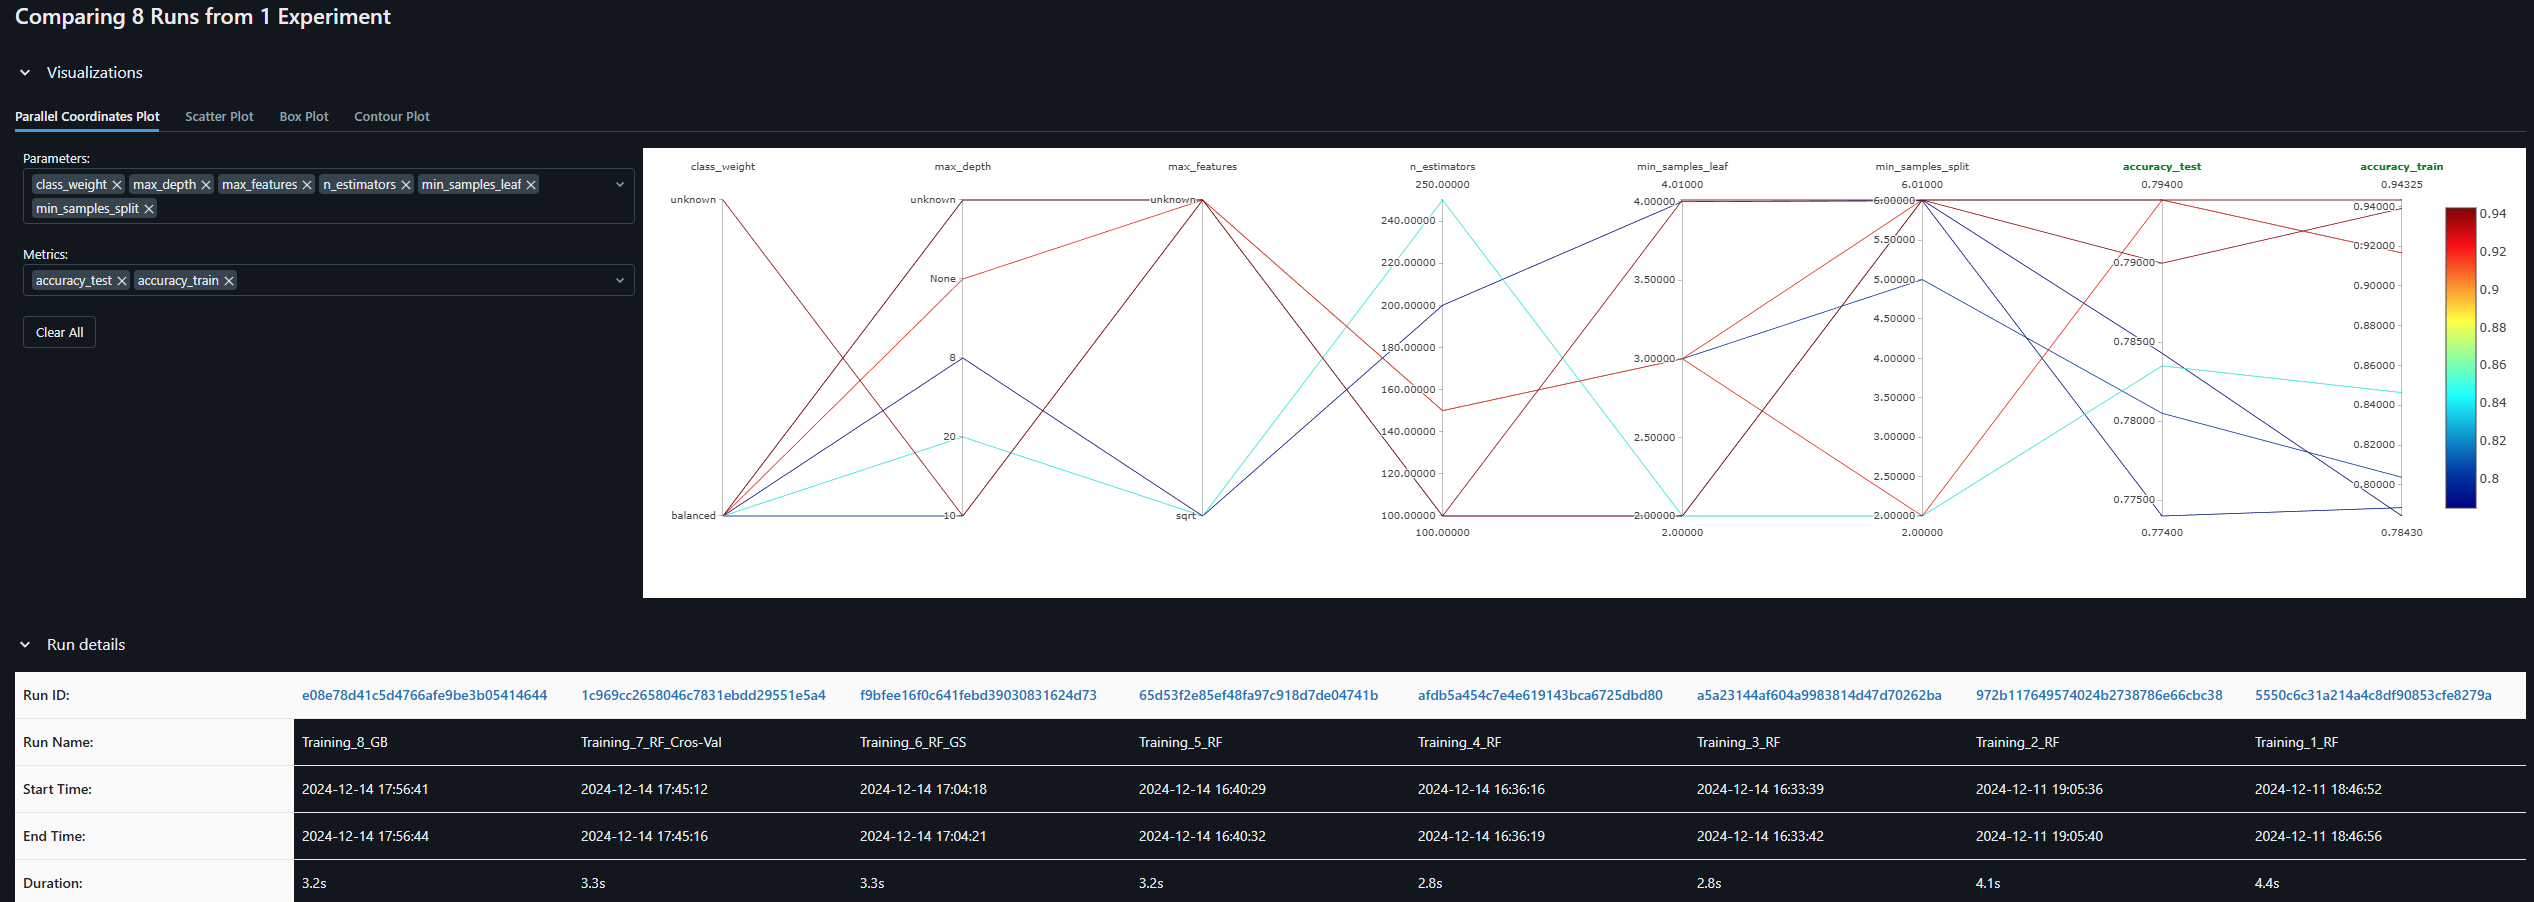

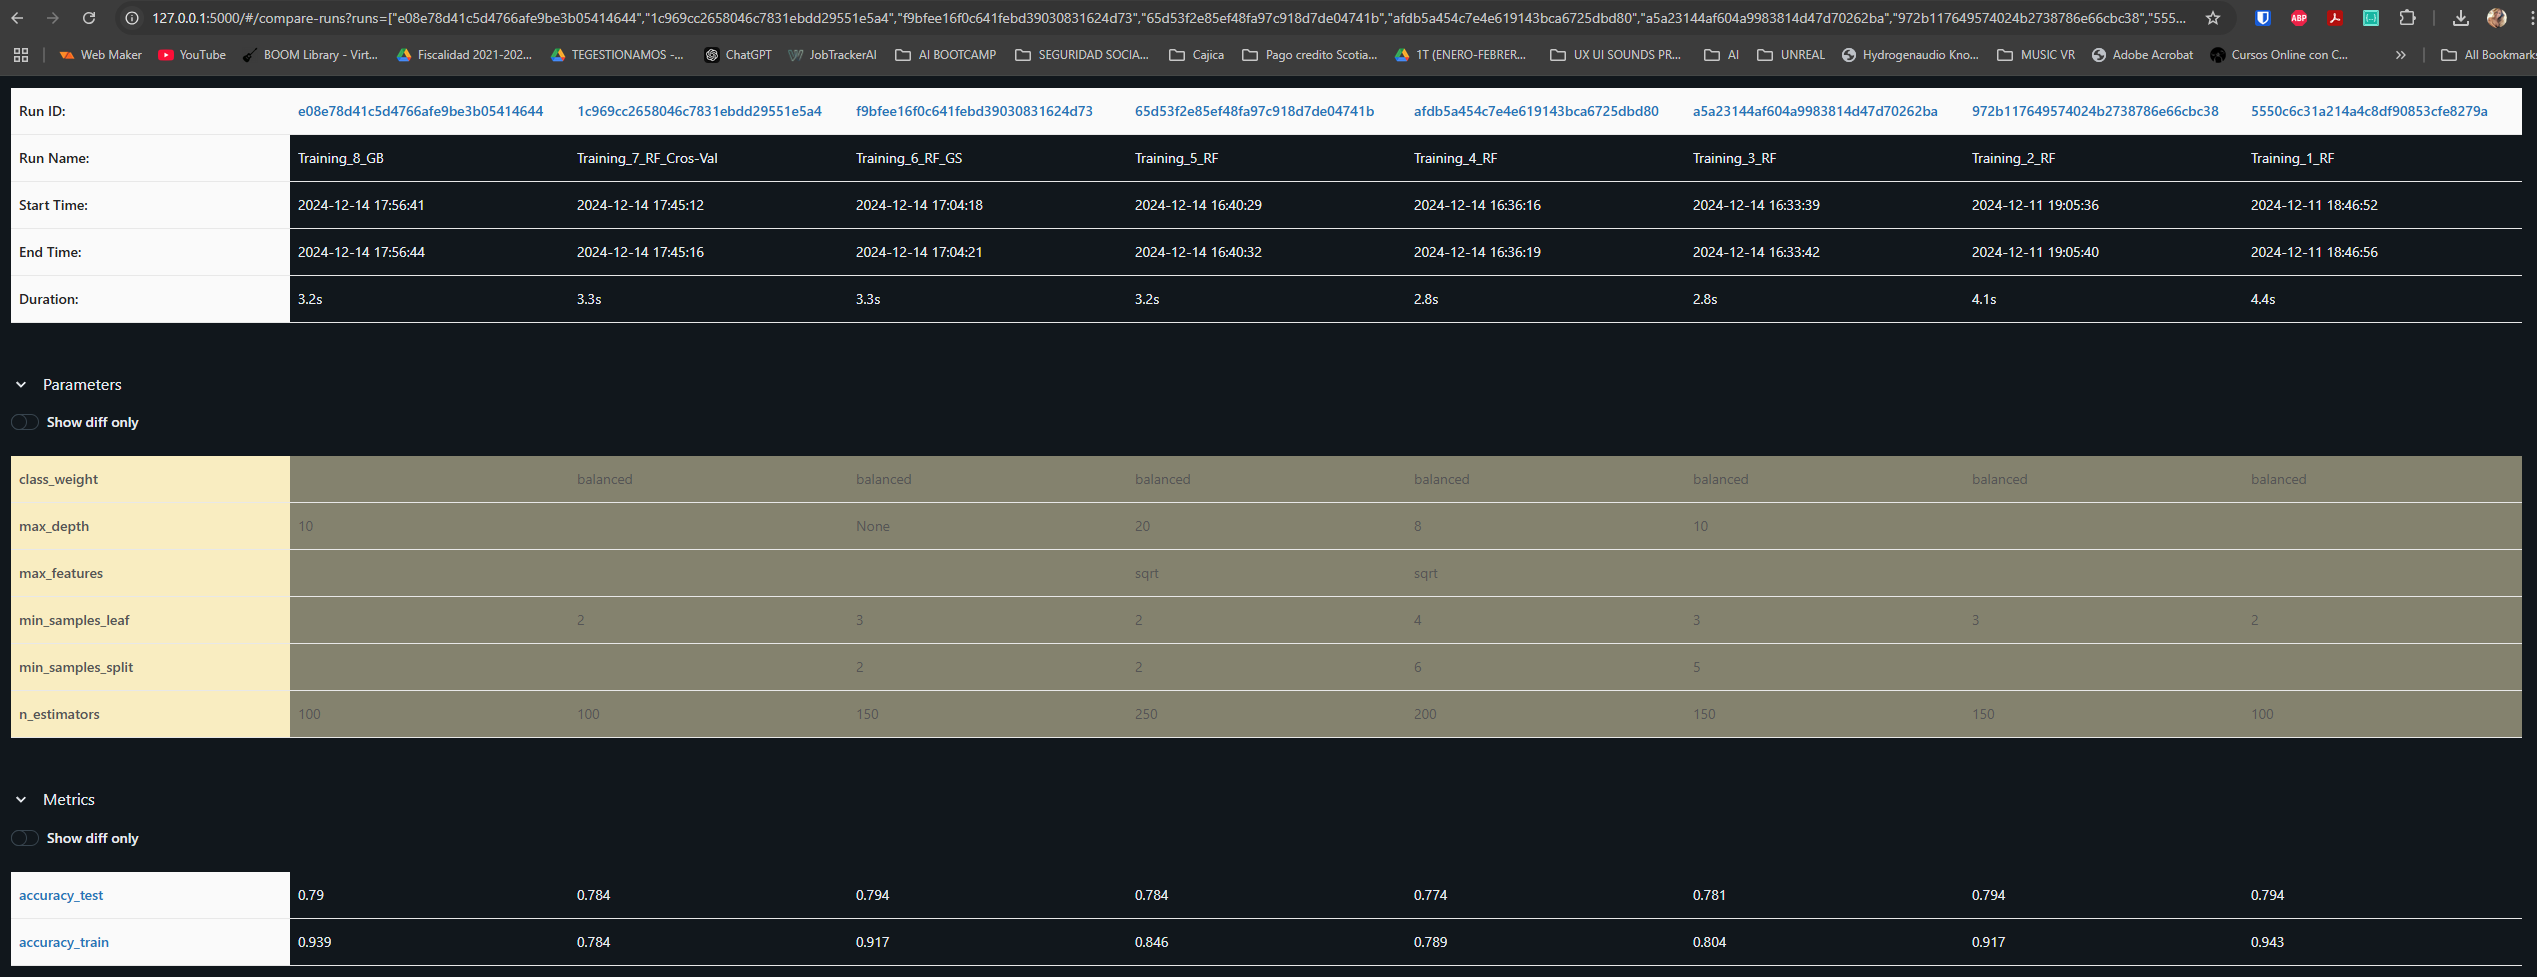

#  **Generar .py de funciones y main con al menos dos argumentos de entrada.**

In [ ]:
# funciones.py

import argparse
import subprocess
import time
import mlflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def argumentos():
    """Función para obtener los argumentos de entrada del usuario"""
    parser = argparse.ArgumentParser(description='Aplicación con argumentos de entrada.')
    parser.add_argument('--nombre_job', type=str, help='Nombre del trabajo en MLflow.')
    parser.add_argument('--n_estimators_list', nargs='+', type=int, help='Lista de valores para n_estimators.')
    return parser.parse_args()

def load_dataset():
    """Carga el dataset preprocesado desde un archivo pickle."""
    df = pd.read_pickle("df_sentpreprocess.pkl")
    return df

def data_treatment(df):
    """Preprocesa los datos y los divide en entrenamiento y prueba."""
    cv = TfidfVectorizer(
        max_df=0.95,
        min_df=3,
        max_features=2500,
        strip_accents='ascii',
        ngram_range=(1, 2)
    )
    X_bow = cv.fit_transform(df['fullProcessedReview']).toarray()
    y = df['sentiment_label']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_bow, y, test_size=0.2, random_state=123, stratify=y
    )

    return X_train, X_test, y_train, y_test

# Modelos de RandomForest

def model_rf(X_train, y_train, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=2):
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight='balanced',
        random_state=123
    )
    preprocessor = Pipeline(steps=[('scaler', StandardScaler())])
    model = Pipeline(steps=[('preprocessor', preprocessor), ('RandomForestClassifier', clf)])
    model.fit(X_train, y_train)
    return model

def model_rf_2(X_train, y_train):
    clf = RandomForestClassifier(
        n_estimators=150, min_samples_leaf=3, class_weight="balanced", random_state=123
    )
    model = Pipeline(steps=[('preprocessor', StandardScaler()), ('RandomForestClassifier', clf)])
    model.fit(X_train, y_train)
    return model

def model_rf_3(X_train, y_train):
    clf = RandomForestClassifier(
        n_estimators=150, max_depth=10, min_samples_split=5, min_samples_leaf=3, class_weight="balanced", random_state=123
    )
    model = Pipeline(steps=[('preprocessor', StandardScaler()), ('RandomForestClassifier', clf)])
    model.fit(X_train, y_train)
    return model

def model_rf_4(X_train, y_train):
    clf = RandomForestClassifier(
        n_estimators=200, max_depth=8, min_samples_split=6, min_samples_leaf=4, max_features='sqrt', class_weight="balanced", random_state=123
    )
    model = Pipeline(steps=[('preprocessor', StandardScaler()), ('RandomForestClassifier', clf)])
    model.fit(X_train, y_train)
    return model

def model_rf_5(X_train, y_train):
    clf = RandomForestClassifier(
        n_estimators=250, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', class_weight="balanced", random_state=123
    )
    model = Pipeline(steps=[('preprocessor', StandardScaler()), ('RandomForestClassifier', clf)])
    model.fit(X_train, y_train)
    return model

def model_rf_grid(X_train, y_train):
    clf = RandomForestClassifier(
        n_estimators=100, min_samples_leaf=2, class_weight='balanced', random_state=123
    )
    param_grid = {
        'n_estimators': [100, 150, 200],
        'max_depth': [None, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3],
    }
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def model_rf_cv(X_train, y_train):
    clf = RandomForestClassifier(
        n_estimators=100, min_samples_leaf=2, class_weight='balanced', random_state=123
    )
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()

# Modelo 8: GradientBoostingClassifier
def model_gb(X_train, y_train):
    clf = GradientBoostingClassifier(
        n_estimators=100, max_depth=10, random_state=123
    )
    clf.fit(X_train, y_train)
    return clf

def mlflow_tracking(nombre_job, X_train, X_test, y_train, y_test, model, n_estimators=None):
    """Función para entrenar los modelos y registrar resultados en MLflow."""
    mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])
    print(mlflow_ui_process)
    time.sleep(5)

    mlflow.set_experiment(nombre_job)

    with mlflow.start_run() as run:
        if n_estimators is not None:
            mlflow.log_param('n_estimators', n_estimators)

        accuracy_train = model.score(X_train, y_train)
        accuracy_test = model.score(X_test, y_test)
        mlflow.log_metric('accuracy_train', accuracy_train)
        mlflow.log_metric('accuracy_test', accuracy_test)

        mlflow.sklearn.log_model(model, 'random_forest_model')

    print("Modelo y métricas registrados en MLflow.")


In [ ]:
# main.py

from funciones import argumentos, load_dataset, data_treatment, model_rf, model_rf_2, model_rf_3, model_rf_4, model_rf_5, model_rf_grid, model_rf_cv, model_gb, mlflow_tracking

def main():
    # Obtener los argumentos del trabajo
    print("Ejecutando el main...")
    args_values = argumentos()

    # Cargar el dataset
    df = load_dataset()

    # Preprocesar los datos y dividirlos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = data_treatment(df)

    # Entrenar y registrar los modelos con MLflow

    # Modelo 1
    model_1 = model_rf(X_train, y_train, n_estimators=args_values.n_estimators_list[0])
    mlflow_tracking(args_values.nombre_job, X_train, X_test, y_train, y_test, model_1, n_estimators=args_values.n_estimators_list[0])

    # Modelo 2
    model_2 = model_rf_2(X_train, y_train)
    mlflow_tracking(args_values.nombre_job, X_train, X_test, y_train, y_test, model_2)

    # Modelo 3
    model_3 = model_rf_3(X_train, y_train)
    mlflow_tracking(args_values.nombre_job, X_train, X_test, y_train, y_test, model_3)

    # Modelo 4
    model_4 = model_rf_4(X_train, y_train)
    mlflow_tracking(args_values.nombre_job, X_train, X_test, y_train, y_test, model_4)

    # Modelo 5
    model_5 = model_rf_5(X_train, y_train)
    mlflow_tracking(args_values.nombre_job, X_train, X_test, y_train, y_test, model_5)

    # Modelo 6 (con GridSearchCV)
    model_6 = model_rf_grid(X_train, y_train)
    mlflow_tracking(args_values.nombre_job, X_train, X_test, y_train, y_test, model_6)

    # Modelo 7 (con validación cruzada)
    cv_score_7 = model_rf_cv(X_train, y_train)
    print(f"Accuracy promedio de validación cruzada (Modelo 7): {cv_score_7}")

    # Modelo 8 (GradientBoostingClassifier)
    model_8 = model_gb(X_train, y_train)
    mlflow_tracking(args_values.nombre_job, X_train, X_test, y_train, y_test, model_8)

if __name__ == "__main__":
    main()


## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
### 2. Captura de cada una de los modulos con la respuesta dentro de docs. 
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run


# **Explicación de los módulos creados:**

**/recommend_products**

Input: Reseña de producto.
Output: Reseñas más similares basadas en la similitud con la reseña proporcionada.

**/sentiment - HuggingFace**

Input: Texto de reseña
Output: Sentimiento de la reseña (positivo o negativo) utilizando un modelo de HuggingFace.

**/summarize - HuggingFace**

Input: Reseña larga.
Output: Resumen de la reseña utilizando un modelo de HuggingFace.

**/basic_stats**

Input: Ninguno.
Output: Distribución de las etiquetas de sentimiento en el dataset.

**/count_words**

Input: Ninguno.
Output: Las 10 palabras más comunes en las reseñas del dataset.

# **1. Módulos** 

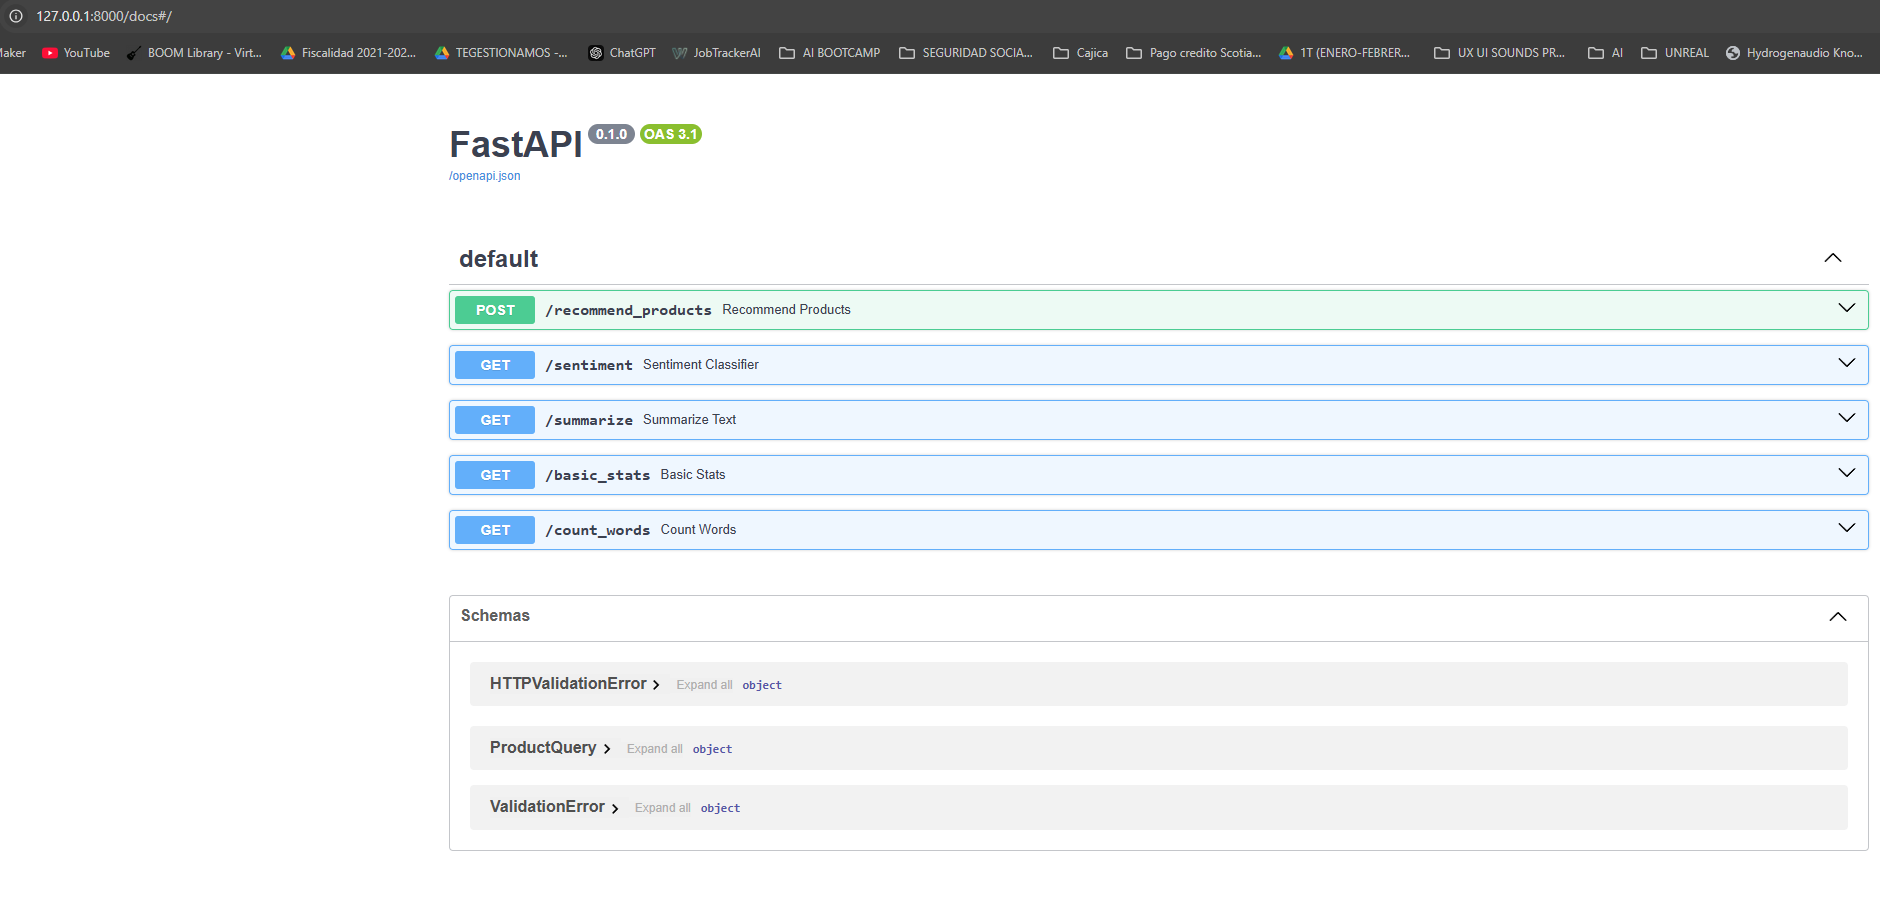

## **2. Capturas run**

**2.1 Recommended Products**
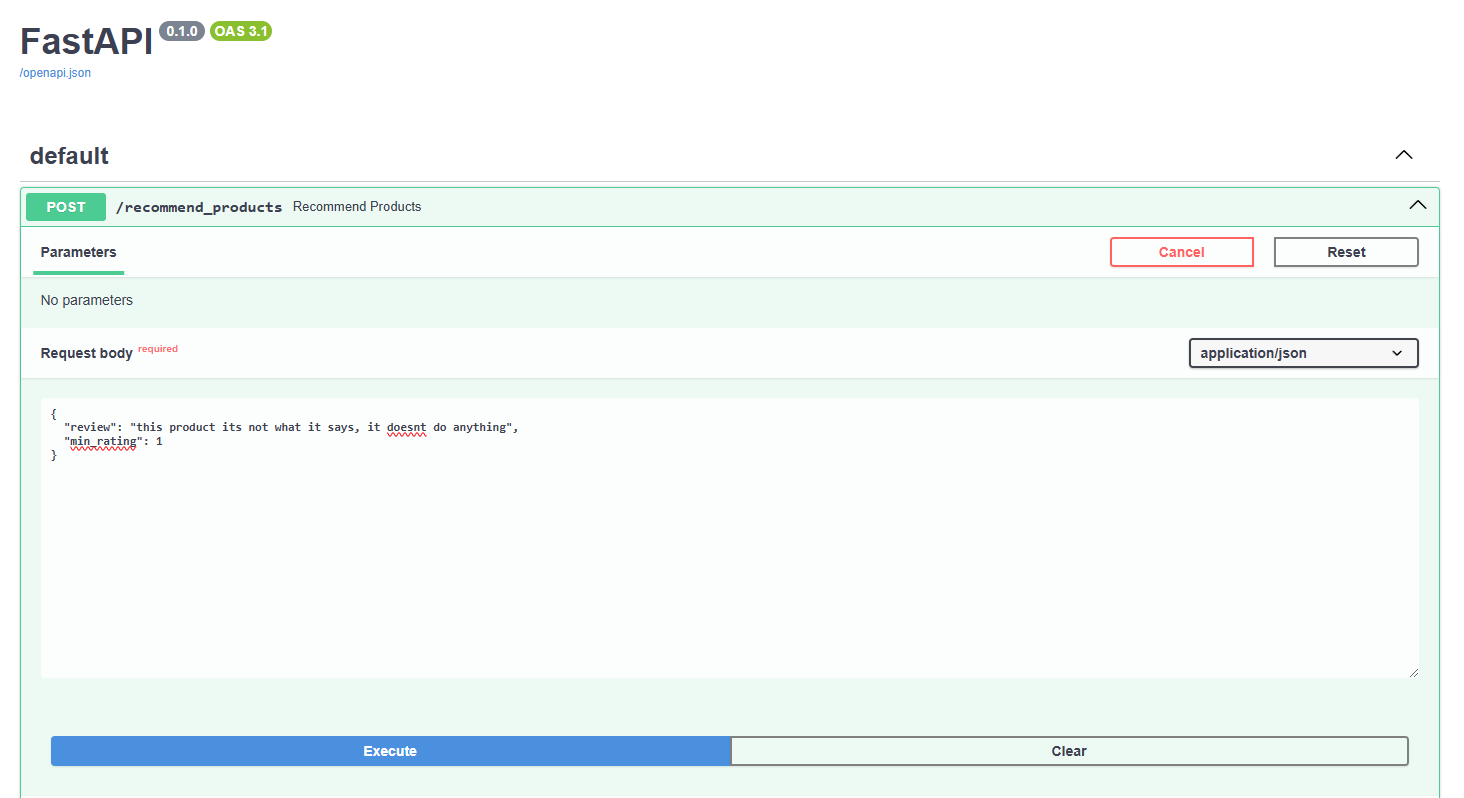


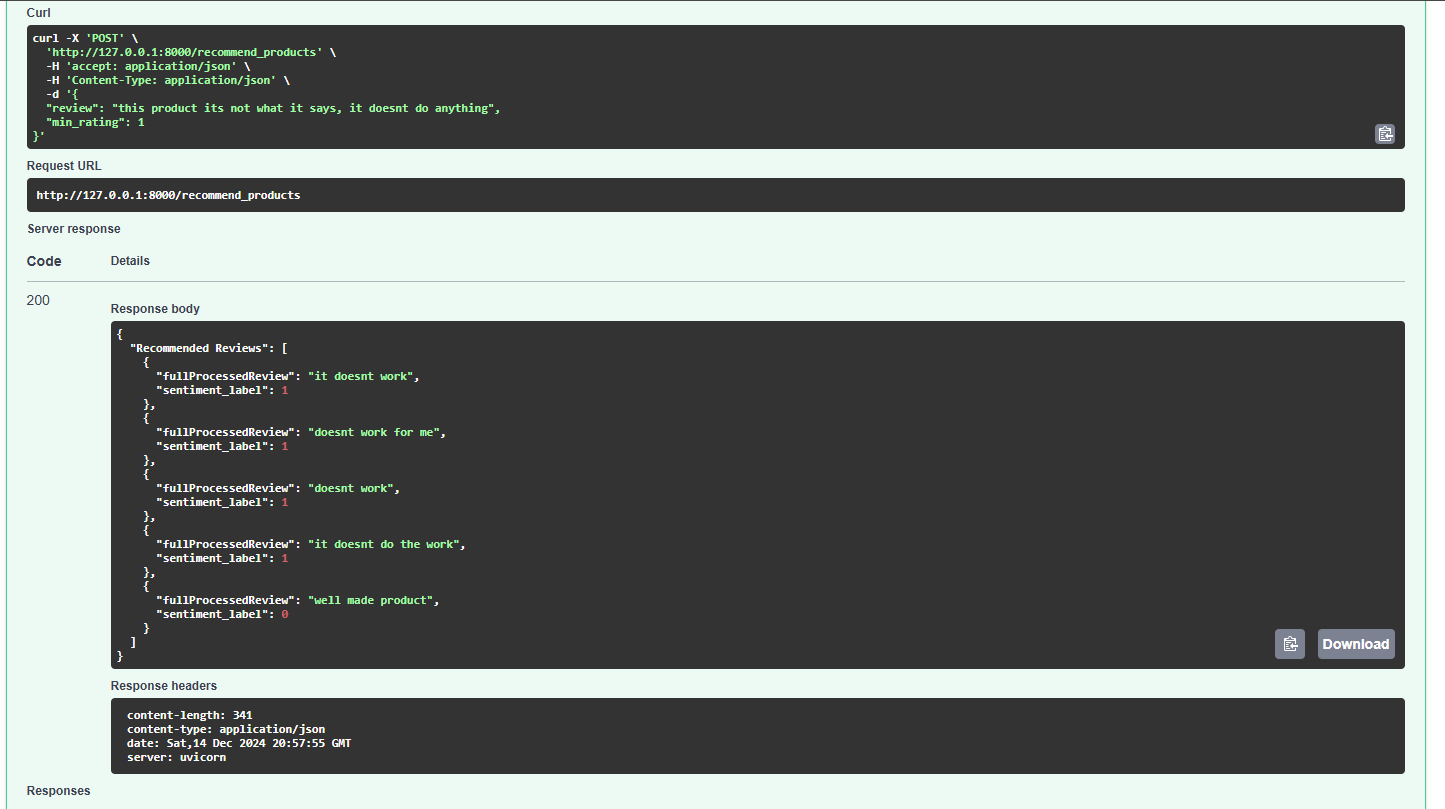

**2.2 Sentiment Analysis - HuggingFace**

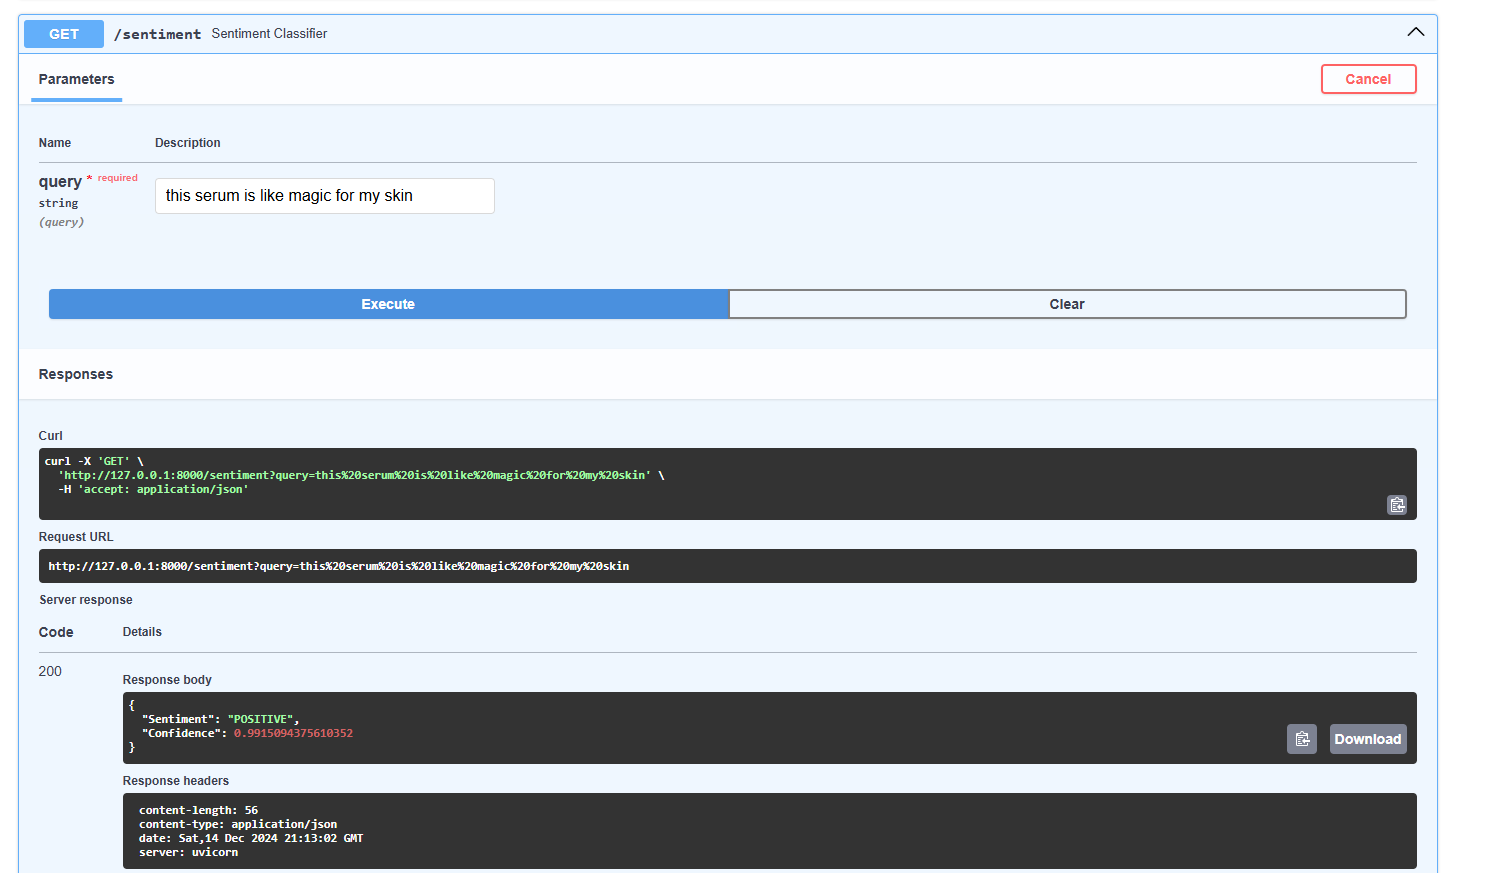

**2.3 Summarize Text**

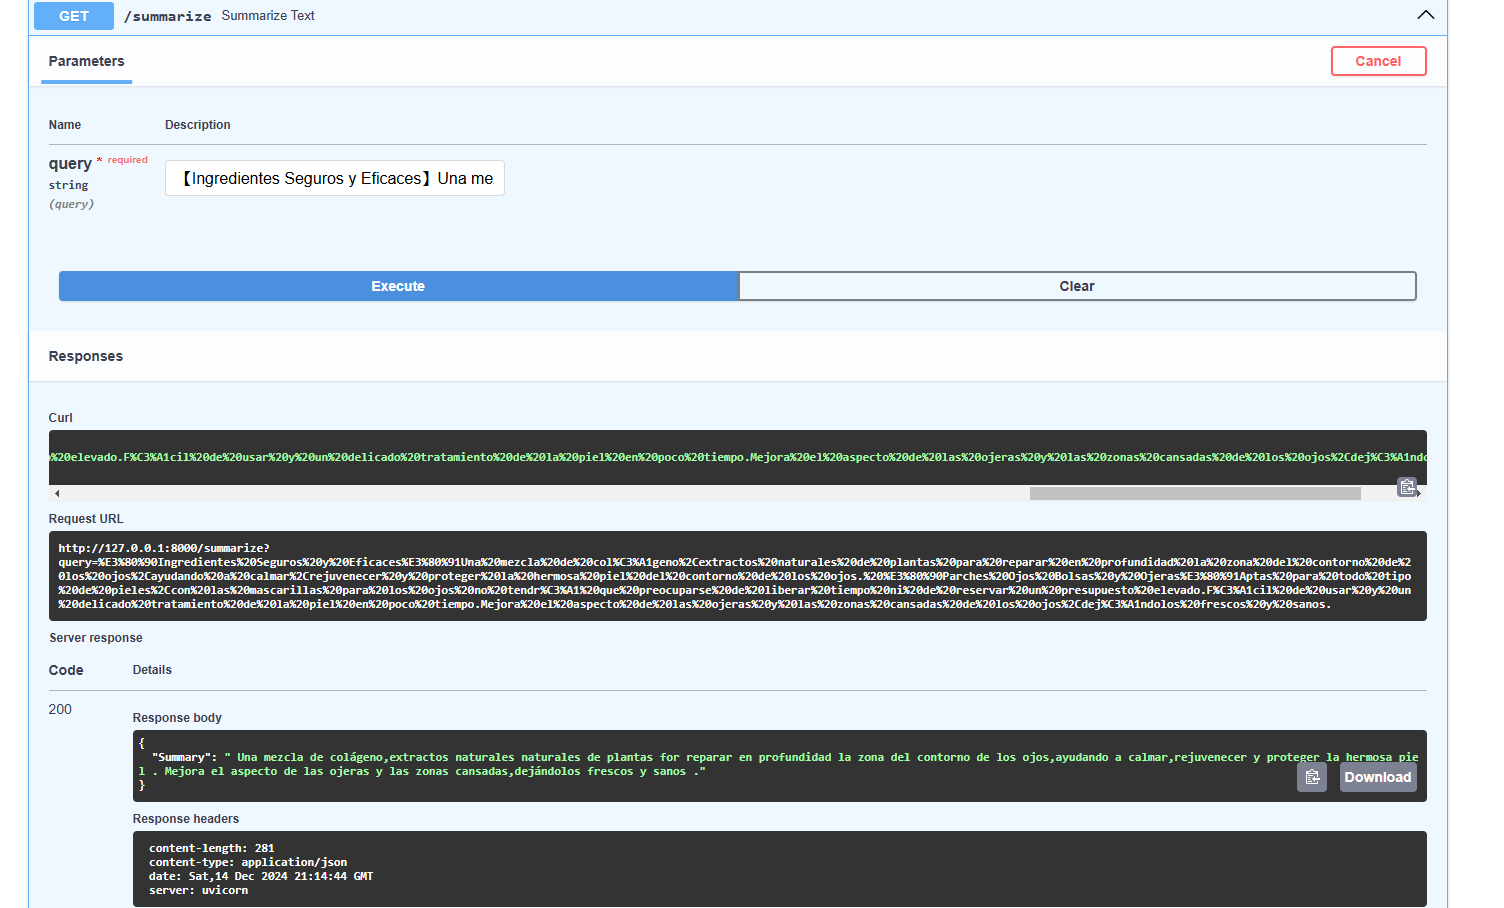

**2.4 Basic Stats**

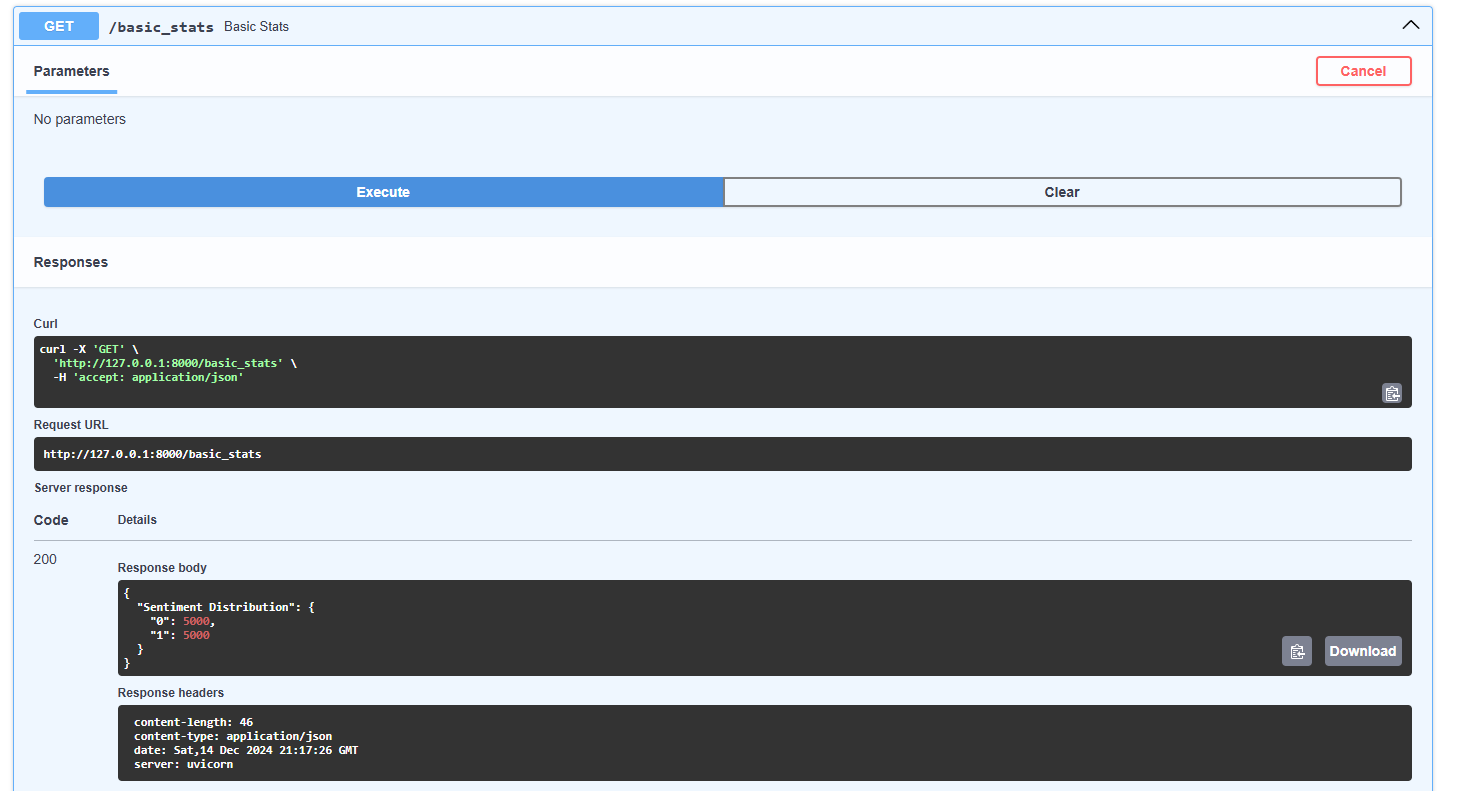

**2.5 Count Words**

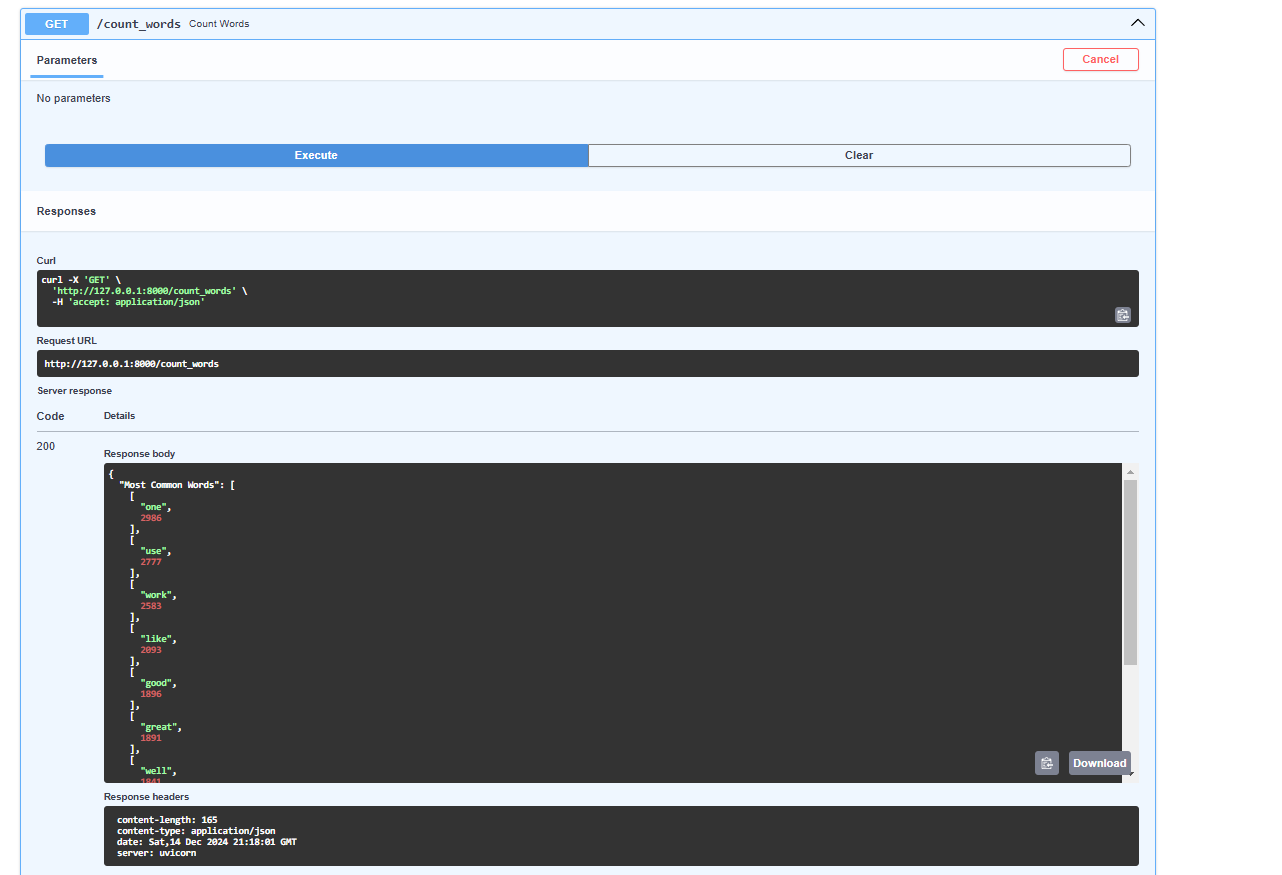

## **3. Capturas llamadas request html**

In [26]:
#/recommend_products
import requests

data = {
  "review": "it leaves my skin red and dry, I had an skin eruption, it irritated all my face",
  "min_rating": 4
}

url = "http://127.0.0.1:8000/recommend_products"

response = requests.post(url, json=data)

if response.status_code ==200:
    print(response.json())

else:
    print(f"Error: (response.status_code)")

{'Recommended Reviews': [{'fullProcessedReview': 'concept good couldnt tolerate plastic skin made skin sweat contact face causing sticky feeling resulting skin eruption tried wrapping edge fabric strip improve didnt help face doesnt sweat maybe might work bust made cloth framework using trimmed zip tie keep mask away face worked better', 'sentiment_label': 1}, {'fullProcessedReview': 'wouldnt stick skin', 'sentiment_label': 1}, {'fullProcessedReview': 'stick skin easily difficult get', 'sentiment_label': 1}, {'fullProcessedReview': 'really nice thing add pampering definitely doesnt dry quickly nice skin face love', 'sentiment_label': 0}, {'fullProcessedReview': 'false advertising it not for your skin', 'sentiment_label': 1}]}


In [27]:
#/sentiment
import requests

data = {
    "query": "this product is fake, not the original, very expensive"
}

url = "http://127.0.0.1:8000/sentiment"

response = requests.get(url, params=data)

if response.status_code ==200:
    print(response.json())

else:
    print(f"Error: (response.status_code)")

{'Sentiment': 'NEGATIVE', 'Confidence': 0.9996386766433716}


In [2]:
#/summarize
import requests

data = {
    "query": "How can we sell more, to more people, and for more money? The marketing world is awash with myths, misconceptions, dubious metrics and tactics that bear little relation to our actual buying behaviour.Eat Your Greens is inspired by the genuine advances in marketing science. It challenges us to change the way we think, by taking the huge body of knowledge gained from data and technology and applying the best evidence based thinking to the practice of marketing and communications."
}

url = "http://127.0.0.1:8000/summarize"

response = requests.get(url, params=data)

if response.status_code ==200:
    print(response.json())

else:
    print(f"Error: (response.status_code)")

{'Summary': ' The marketing world is awash with myths, misconceptions, dubious metrics and tactics that bear little relation to our actual buying behaviour . Eat Your Greens challenges us to change the way we think, by taking the huge body of knowledge gained from data and technology and applying the best evidence based thinking to the practice of marketing and communications .'}


In [31]:
#/basic_stats
import requests

url = "http://127.0.0.1:8000/basic_stats"

response = requests.get(url)

if response.status_code ==200:
    print(response.json())

else:
    print(f"Error: (response.status_code)")

{'Sentiment Distribution': {'0': 5000, '1': 5000}}


In [32]:
#/count_words
import requests

url = "http://127.0.0.1:8000/count_words"

response = requests.get(url)

if response.status_code ==200:
    print(response.json())

else:
    print(f"Error: (response.status_code)")

{'Most Common Words': [['one', 2986], ['use', 2777], ['work', 2583], ['like', 2093], ['good', 1896], ['great', 1891], ['well', 1841], ['get', 1814], ['would', 1753], ['product', 1458]]}


: 

# **4. Codigo fastapi**

In [ ]:
# main.py fastapi


from fastapi import FastAPI
from pydantic import BaseModel
from typing import Optional
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline
import collections

app = FastAPI()

# Cargar el dataframe de reseñas de productos
df = pd.read_pickle("D:/AI Bootcamp Github/despliegue-algoritmos/Sentiment Analysis NLP to Mlflow/fast_api/to_deeplearning.pkl")


# Vectorizar las reseñas de productos con TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df['fullProcessedReview'])

# Función para obtener productos similares basados en la reseña
def get_similar_products(query: str, top_n: int = 5):
    query_vector = vectorizer.transform([query])  # Vectorizar la consulta del usuario
    similarities = cosine_similarity(query_vector, X)  # Calcular similitud de coseno
    
    # Obtener los índices de las reseñas más similares
    similar_indices = similarities.argsort()[0][-top_n:][::-1]
    similar_reviews = df.iloc[similar_indices]  # Obtener las reseñas recomendadas
    
    return similar_reviews[['fullProcessedReview', 'sentiment_label']]

# Definir modelo para la consulta del usuario
class ProductQuery(BaseModel):
    review: str
    min_rating: Optional[float] = 4.0  # Puntuación mínima deseada para el producto

# 1. Módulo de Recomendación de Productos basado en Reseñas (Sin HuggingFace)
@app.post('/recommend_products')
def recommend_products(query: ProductQuery):
    similar_reviews = get_similar_products(query.review)
    return {'Recommended Reviews': similar_reviews.to_dict(orient='records')}

# 2. Módulo de Análisis de Sentimientos usando HuggingFace
@app.get('/sentiment')
def sentiment_classifier(query: str): 
    sentiment_pipeline = pipeline('sentiment-analysis')
    result = sentiment_pipeline(query)
    return {'Sentiment': result[0]['label'], 'Confidence': result[0]['score']}

# 3. Módulo de Resumen de Reseña usando HuggingFace
@app.get('/summarize')
def summarize_text(query: str): 
    summarization_pipeline = pipeline('summarization')
    summary = summarization_pipeline(query)
    return {'Summary': summary[0]['summary_text']}

# 4. Módulo de Estadísticas Básicas del Dataset (Sin HuggingFace)
@app.get('/basic_stats')
def basic_stats(): 
    sentiment_counts = df['sentiment_label'].value_counts()
    return {'Sentiment Distribution': sentiment_counts.to_dict()}

# 5. Módulo de Contar Palabras más Comunes en Reseñas (Sin HuggingFace)
@app.get('/count_words')
def count_words(): 
    text = ' '.join(df['fullProcessedReview'])
    words = text.split()
    word_counts = collections.Counter(words)
    common_words = word_counts.most_common(10)
    return {'Most Common Words': common_words}


# **5. Desplegar en Google Cloud Run**

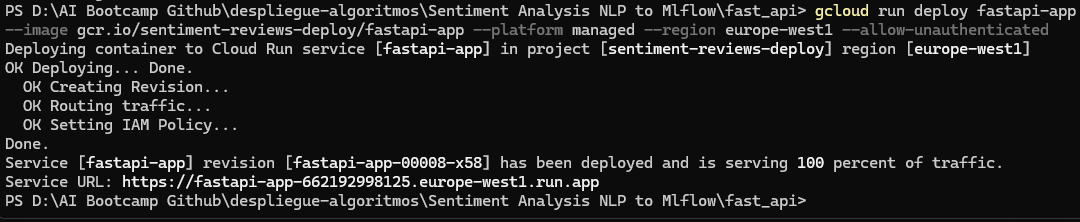

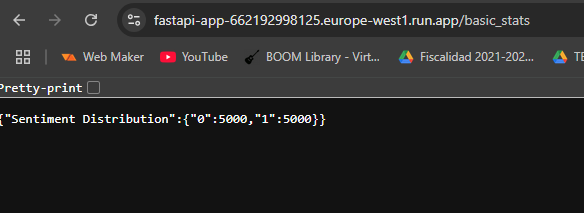

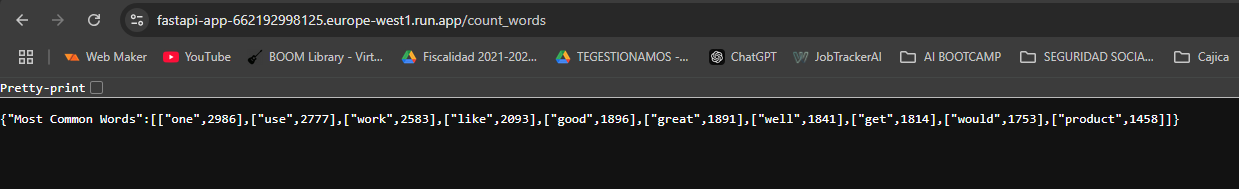